<a href="https://colab.research.google.com/github/Mdhasim-tech/Machine-learning/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the dataset
df = pd.read_csv("Groceries_dataset.csv")

# Take a small subset
sample_products = df['itemDescription'].dropna().unique()
sample_members = df['Member_number'].dropna().unique()

# df_small = df[df['itemDescription'].isin(sample_products) & df['Member_number'].isin(sample_members)]
# print(df_small)

In [23]:
# Create product-member matrix
product_member_matrix = pd.crosstab(df['itemDescription'], df['Member_number'])

In [24]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
product_member_matrix['cluster'] = kmeans.fit_predict(product_member_matrix)

In [25]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(product_member_matrix.drop('cluster', axis=1))
product_member_matrix['x'] = reduced[:, 0]
product_member_matrix['y'] = reduced[:, 1]

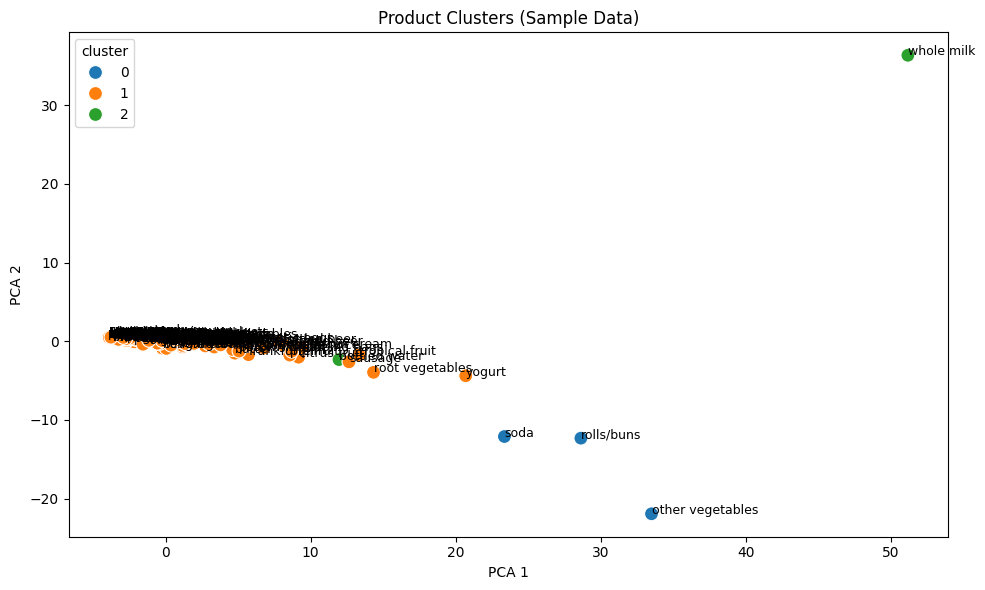

In [26]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_member_matrix, x='x', y='y', hue='cluster', palette='tab10', s=100)

for i, txt in enumerate(product_member_matrix.index):
    plt.annotate(txt, (product_member_matrix.x.iat[i], product_member_matrix.y.iat[i]), fontsize=9)

plt.title("Product Clusters (Sample Data)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()

In [30]:
product_name = "pastry"
cluster_id = product_member_matrix.loc[product_name, 'cluster']
similar_products = product_member_matrix[product_member_matrix['cluster'] == cluster_id].index.tolist()

print(f"🧾 Products in same cluster as '{product_name}':")
print(similar_products)


🧾 Products in same cluster as 'pastry':
['Instant food products', 'UHT-milk', 'abrasive cleaner', 'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder', 'bathroom cleaner', 'beef', 'berries', 'beverages', 'bottled beer', 'brandy', 'brown bread', 'butter', 'butter milk', 'cake bar', 'candles', 'candy', 'canned beer', 'canned fish', 'canned fruit', 'canned vegetables', 'cat food', 'cereals', 'chewing gum', 'chicken', 'chocolate', 'chocolate marshmallow', 'citrus fruit', 'cleaner', 'cling film/bags', 'cocoa drinks', 'coffee', 'condensed milk', 'cooking chocolate', 'cookware', 'cream', 'cream cheese ', 'curd', 'curd cheese', 'decalcifier', 'dental care', 'dessert', 'detergent', 'dish cleaner', 'dishes', 'dog food', 'domestic eggs', 'female sanitary products', 'finished products', 'fish', 'flour', 'flower (seeds)', 'flower soil/fertilizer', 'frankfurter', 'frozen chicken', 'frozen dessert', 'frozen fish', 'frozen fruits', 'frozen meals', 'frozen potato products', 'frozen vegetables'